#Question 1

# Question 2


# Question 3

# Question 4

# Question 5

# Question 6

# Question 7

# Question 8

# Question 9

# Question 10

# Question 11

# Question 12

# Question 13

# Question 14

# Question 15

# Question 16

# Question 17

# 2: Exraction & Exploration of Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Dataset extraction
import os
import tarfile

drive_path = '/content/drive/My Drive/gplus.tar.gz'
extract_dir = 'gplus'

# Check if file exists
if os.path.exists(drive_path):
    print("File found, extracting...")
    os.makedirs(extract_dir, exist_ok=True)
    with tarfile.open(drive_path, "r:gz") as tar:
        tar.extractall(extract_dir)
    print("Extraction complete.")
else:
    print("File not found. Check the path.")

File found, extracting...
Extraction complete.


In [11]:
# Print content of gplus directory
for root, dirs, files in os.walk("gplus"):
    print(f"Directory: {root}")
    for file in files[:5]:  # Print a few files
        print("   └──", file)

Directory: gplus
Directory: gplus/gplus
   └── 101133961721621664586.feat
   └── 107040353898400532534.featnames
   └── 101626577406833098387.feat
   └── 110241952466097562819.circles
   └── 103537112468125883734.followers


In [13]:
# Print content of first few .circles files
for file in os.listdir('gplus/gplus'):
    if file.endswith(".circles"):
        print(f"\n--- {file} ---")
        with open(os.path.join('gplus/gplus', file), "r") as f:
            for line in f:
                print(line.strip())
        break  # Print only the first few


--- 110241952466097562819.circles ---
9mENop2BfTg	103650208770613583188
3RSyt9yB8p2	103650208770613583188


In [17]:
# Print number of users with >2 circles
valid_users = []

for file in os.listdir('gplus/gplus'):
    if file.endswith(".circles"):
        path = os.path.join('gplus/gplus', file)

        with open(path, "r") as f:
            # Count lines as number of circles
            circle_lines = [line.strip() for line in f if line.strip()]
            num_circles = len(circle_lines)

            if num_circles > 2:
                user_id = file.split(".")[0]
                valid_users.append(user_id)

print(f"Users with >2 circles: {len(valid_users)}")

Users with >2 circles: 57


In [18]:
# Print number of circles each user has
for file in os.listdir('gplus/gplus'):
    if file.endswith(".circles"):
     path = os.path.join('gplus/gplus', file)
     with open(path, "r") as f:
        num_lines = sum(1 for line in f if line.strip())
        print(f"{file}: {num_lines} circles")

110241952466097562819.circles: 2 circles
104105354262797387583.circles: 10 circles
116807883656585676940.circles: 3 circles
108883879052307976051.circles: 3 circles
114104634069486127920.circles: 2 circles
116931379084245069738.circles: 4 circles
114054672576929802335.circles: 2 circles
110538600381916983600.circles: 3 circles
118255645714452180374.circles: 2 circles
105646458226420473639.circles: 2 circles
115576988435396060952.circles: 2 circles
103338524411980406972.circles: 2 circles
107013688749125521109.circles: 2 circles
116899029375914044550.circles: 2 circles
113455290791279442483.circles: 2 circles
114124942936679476879.circles: 2 circles
103503116383846951534.circles: 2 circles
116315897040732668413.circles: 3 circles
114122960748905067938.circles: 2 circles
101541879642294398860.circles: 5 circles
113881433443048137993.circles: 7 circles
115273860520983542999.circles: 1 circles
110701307803962595019.circles: 5 circles
105565257978663183206.circles: 2 circles
104290609881668

In [21]:
# Print content of a specific .circles file
file_name = "110701307803962595019.circles"
file_path = os.path.join("gplus/gplus", file_name)

if os.path.exists(file_path):
    print(f"Contents of {file_name}:\n")
    with open(file_path, "r") as f:
        for line in f:
            print(line.strip())
else:
    print(f"ile {file_name} not found.")

Contents of 110701307803962595019.circles:

2EVfhLLMeuG	107982737400457212709	105901182261884628679	101111269969899151919	116248523622526229178	102395595309152991665	112827453273405701734	112963105635376422421	114886348310358897265	109143384193766932670	108473613890726215442	113376742759915319727	107051665537162034944	118055335891923950494	112068096053627970202	101475873089004686144	102372690636453052676	108059096144020001716	105722278908183791027	113153259991756394165	108952536790629690817	111674060767832848917	109927484147791985788	103044522173130382644	101891715056742297073	106220600090297128338	112088443759787333798	116214152295449083654	117759233139756138291	103164003989913651658	111223345442355298240	112794502503234312526	101543350465102852132	117328732331103841331	103040852335353963428	106944536119733342041	114607043207014058571	102563035692347750787	113165147467813592377	101927826925353835962	118326452310645730031	100377536816925183802	101841421780149979246	10978744268726524363

# Question 18

In [26]:
import os
import networkx as nx

data_dir = "gplus/gplus"
personal_networks = {}  # Dictionary to store user_id → DiGraph

circle_files = [f for f in os.listdir(data_dir) if f.endswith(".circles")]

for file in circle_files:
    user_id = file.split(".")[0]
    circle_path = os.path.join(data_dir, file)

    with open(circle_path, "r") as f:
        circles = [line.strip() for line in f if line.strip()]
        if len(circles) <= 2:
            continue  # Skip users with 2 or fewer circles

    edge_path = os.path.join(data_dir, f"{user_id}.edges")
    if not os.path.exists(edge_path):
        continue  # Skip users without .edges file

    # Build the directed graph from the .edges file
    G = nx.DiGraph()
    with open(edge_path, "r") as f:
        for line in f:
            u, v = line.strip().split()
            G.add_edge(u, v)

    # Store the graph in a dictionary
    personal_networks[user_id] = G

print(f"Total directed personal networks created: {len(personal_networks)}")

Total directed personal networks created: 57


Total Number of personal networks = 57

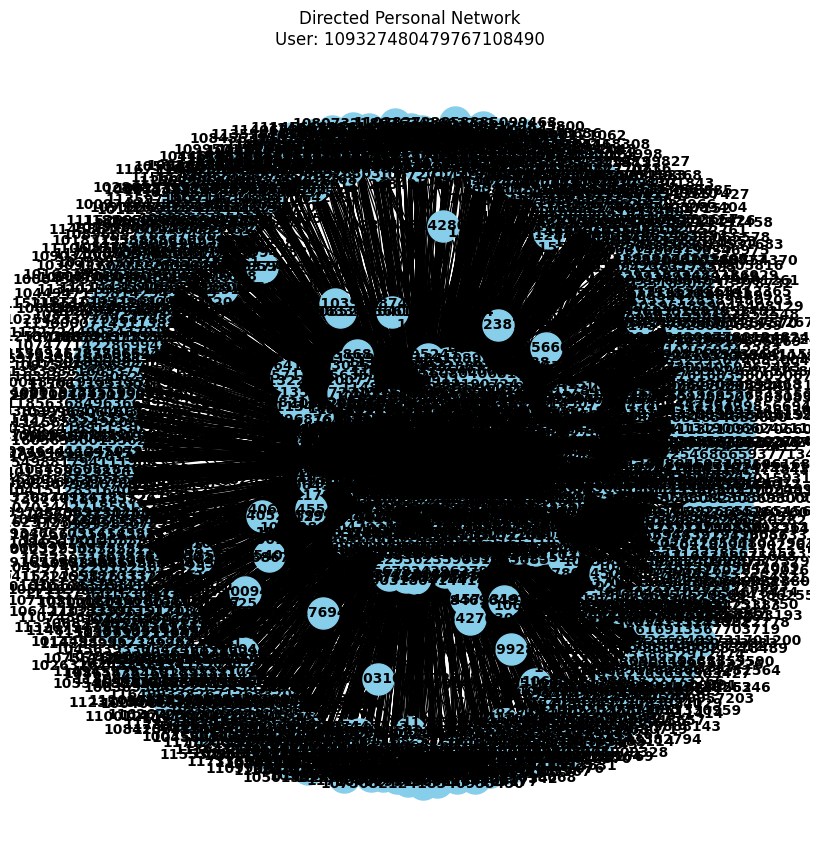

In [28]:
# Visualizing the directed personal network for a user
import matplotlib.pyplot as plt

user_id = '109327480479767108490'

G = personal_networks[user_id]

# Plot directed graph using NetworkX
plt.figure(figsize=(8, 8))  # Set the figure size
pos = nx.spring_layout(G)  # Positions for the nodes using Fruchterman-Reingold force-directed algorithm
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrows=True)

plt.title(f"Directed Personal Network\nUser: {user_id}")
plt.show()

# Question 19

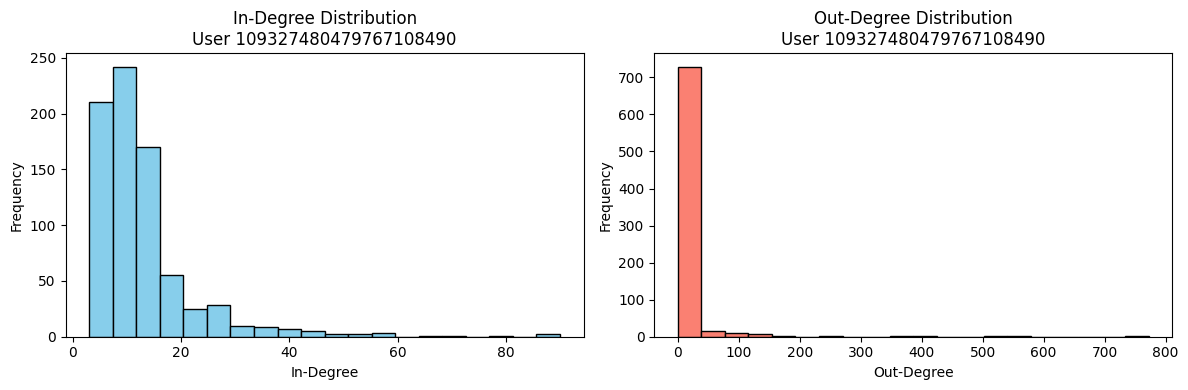

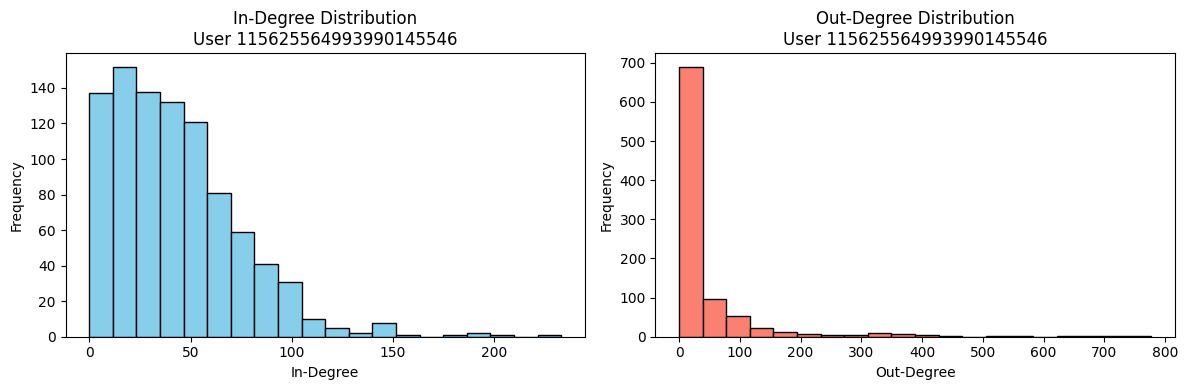

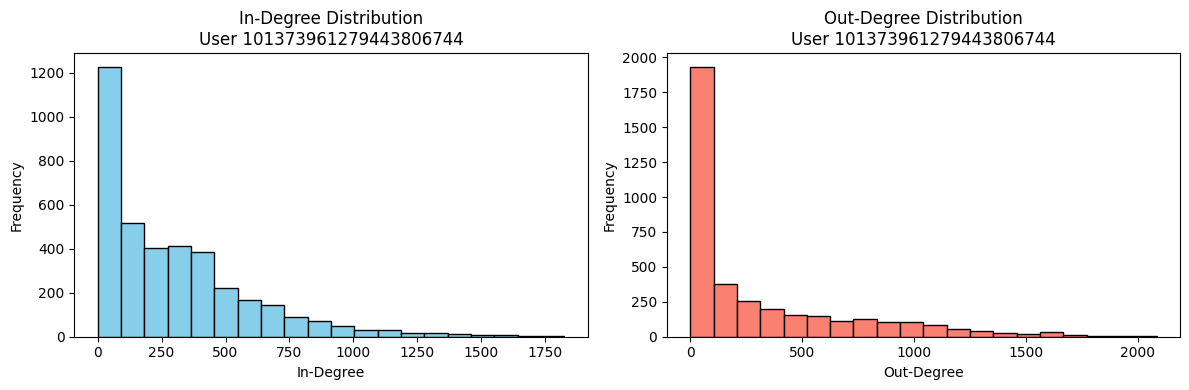

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

user_ids = [
    "109327480479767108490",
    "115625564993990145546",
    "101373961279443806744"
]

def plot_degrees(user_id, data_dir):
    edge_path = os.path.join(data_dir, f"{user_id}.edges")

    if not os.path.exists(edge_path):
        print(f"Edges file not found for user {user_id}")
        return

    G = nx.DiGraph()

    with open(edge_path, "r") as f:
        for line in f:
            u, v = line.strip().split()
            G.add_edge(u, v)

    in_degrees = [d for n, d in G.in_degree()]
    out_degrees = [d for n, d in G.out_degree()]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(in_degrees, bins=20, color="skyblue", edgecolor="black")
    plt.title(f"In-Degree Distribution\nUser {user_id}")
    plt.xlabel("In-Degree")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(out_degrees, bins=20, color="salmon", edgecolor="black")
    plt.title(f"Out-Degree Distribution\nUser {user_id}")
    plt.xlabel("Out-Degree")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Plot for each of the 3 users
for uid in user_ids:
    plot_degrees(uid, data_dir)

# Question 20

# Question 21

# Question 22

# Question 23

# Question 24

# Question 25